In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("cover_type (1).csv")
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness_Area,Soil_Type
0,2596,51,3,258,0,510,221,232,148,6279,Aspen,1,29
1,2590,56,2,212,-6,390,220,235,151,6225,Aspen,1,29
2,2804,139,9,268,65,3180,234,238,135,6121,Lodgepole Pine,1,12
3,2785,155,18,242,118,3090,238,238,122,6211,Lodgepole Pine,1,30
4,2595,45,2,153,-1,391,220,234,150,6172,Aspen,1,29


In [7]:
X = df.drop("Cover_Type", axis =1)
y = df["Cover_Type"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [9]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    return acc, cm, cr

In [33]:
lr = LogisticRegression(max_iter=1000, n_jobs=-1)
lr.fit(X_train, y_train)

lr_acc, lr_cm, lr_cr = evaluate_model(lr, X_test, y_test)

print("Logistic Regression Accuracy:", lr_acc)
print("\nClassification Report:\n", lr_cr)

Logistic Regression Accuracy: 0.7924806360956885

Classification Report:
                    precision    recall  f1-score   support

            Aspen       0.72      0.09      0.16       614
Cottonwood/Willow       0.77      0.77      0.77       432
      Douglas-fir       0.43      0.09      0.15       432
        Krummholz       0.56      0.34      0.42       432
   Lodgepole Pine       0.81      0.97      0.88     20614
   Ponderosa Pine       0.56      0.30      0.39       432
       Spruce/Fir       0.75      0.39      0.51      6222

         accuracy                           0.79     29178
        macro avg       0.66      0.42      0.47     29178
     weighted avg       0.78      0.79      0.76     29178



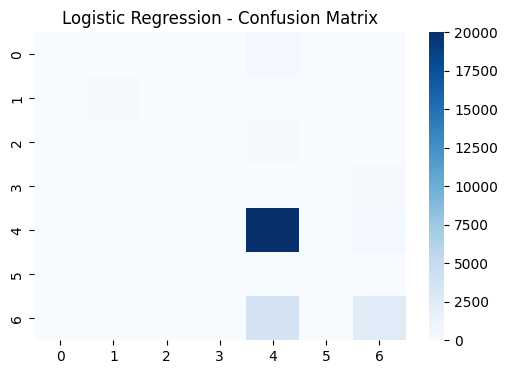

In [34]:
plt.figure(figsize=(6,4))
sns.heatmap(lr_cm, annot=False, cmap="Blues",)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_acc, knn_cm, knn_cr = evaluate_model(knn, X_test, y_test)

print("KNN Accuracy:", knn_acc)
print("\nClassification Report:\n", knn_cr)

KNN Accuracy: 0.9570224141476454

Classification Report:
                    precision    recall  f1-score   support

            Aspen       0.85      0.89      0.87       614
Cottonwood/Willow       0.87      0.96      0.91       432
      Douglas-fir       0.84      0.78      0.80       432
        Krummholz       0.87      0.97      0.92       432
   Lodgepole Pine       0.97      0.98      0.98     20614
   Ponderosa Pine       0.87      0.65      0.74       432
       Spruce/Fir       0.94      0.92      0.93      6222

         accuracy                           0.96     29178
        macro avg       0.89      0.88      0.88     29178
     weighted avg       0.96      0.96      0.96     29178



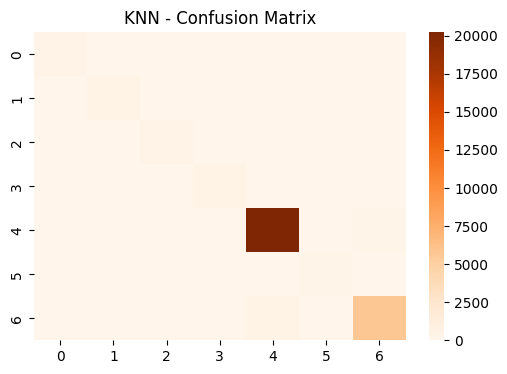

In [36]:
plt.figure(figsize=(6,4))
sns.heatmap(knn_cm, annot=False, cmap="Oranges")
plt.title("KNN - Confusion Matrix")
plt.show()

In [37]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

rf_acc, rf_cm, rf_cr = evaluate_model(rf, X_test, y_test)

print("Random Forest Accuracy:", rf_acc)
print("\nClassification Report:\n", rf_cr)

Random Forest Accuracy: 0.9552059771060388

Classification Report:
                    precision    recall  f1-score   support

            Aspen       0.90      0.85      0.87       614
Cottonwood/Willow       0.94      0.96      0.95       432
      Douglas-fir       0.82      0.87      0.85       432
        Krummholz       0.93      0.97      0.95       432
   Lodgepole Pine       0.96      0.98      0.97     20614
   Ponderosa Pine       0.85      0.82      0.84       432
       Spruce/Fir       0.95      0.88      0.92      6222

         accuracy                           0.96     29178
        macro avg       0.91      0.91      0.91     29178
     weighted avg       0.96      0.96      0.95     29178



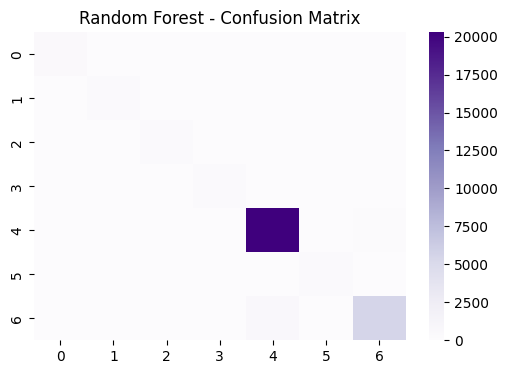

In [38]:
plt.figure(figsize=(6,4))
sns.heatmap(rf_cm, annot=False, cmap="Purples")
plt.title("Random Forest - Confusion Matrix")
plt.show()

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le = LabelEncoder()

y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [41]:
xgb = XGBClassifier(
    objective="multi:softmax",
    num_class=7,
    eval_metric="mlogloss",
    random_state=42,
    n_estimators=50,
    n_jobs=-1
)

xgb.fit(X_train, y_train_enc)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=-1, num_class=7, ...)

In [42]:
y_pred_enc = xgb.predict(X_test)

# Decode back to original labels
y_pred = le.inverse_transform(y_pred_enc)

xgb_acc = accuracy_score(y_test, y_pred)
xgb_cm = confusion_matrix(y_test, y_pred)
xgb_cr = classification_report(y_test, y_pred)

print("XGBoost Accuracy:", xgb_acc)
print("\nClassification Report:\n", xgb_cr)

XGBoost Accuracy: 0.9144218246624168

Classification Report:
                    precision    recall  f1-score   support

            Aspen       0.85      0.80      0.82       614
Cottonwood/Willow       0.94      0.96      0.95       432
      Douglas-fir       0.76      0.81      0.78       432
        Krummholz       0.93      0.97      0.95       432
   Lodgepole Pine       0.93      0.97      0.95     20614
   Ponderosa Pine       0.79      0.78      0.78       432
       Spruce/Fir       0.90      0.75      0.82      6222

         accuracy                           0.91     29178
        macro avg       0.87      0.86      0.86     29178
     weighted avg       0.91      0.91      0.91     29178



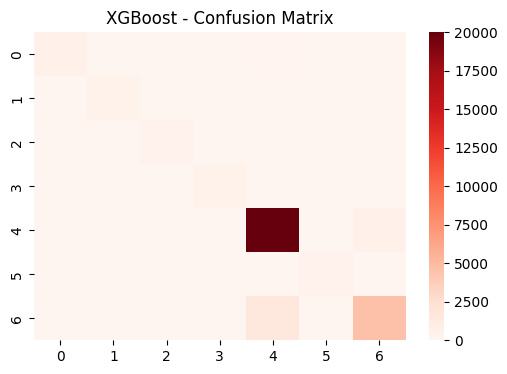

In [43]:
plt.figure(figsize=(6,4))
sns.heatmap(xgb_cm, annot=False, cmap="Reds")
plt.title("XGBoost - Confusion Matrix")
plt.show()

In [44]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

dt_acc, dt_cm, dt_cr = evaluate_model(dt, X_test, y_test)

print("Decision Tree Accuracy:", dt_acc)
print("\nClassification Report:\n", dt_cr)

Decision Tree Accuracy: 0.9377613270272123

Classification Report:
                    precision    recall  f1-score   support

            Aspen       0.84      0.82      0.83       614
Cottonwood/Willow       0.93      0.90      0.91       432
      Douglas-fir       0.77      0.78      0.77       432
        Krummholz       0.92      0.94      0.93       432
   Lodgepole Pine       0.96      0.97      0.96     20614
   Ponderosa Pine       0.76      0.76      0.76       432
       Spruce/Fir       0.90      0.88      0.89      6222

         accuracy                           0.94     29178
        macro avg       0.87      0.86      0.86     29178
     weighted avg       0.94      0.94      0.94     29178



In [45]:
comparison_df = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "KNN",
        "Random Forest",
        "XGBoost"
    ],
    "Accuracy": [
        lr_acc,
        dt_acc,
        knn_acc,
        rf_acc,
        xgb_acc
    ]
})

comparison_df.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
2,KNN,0.957022
3,Random Forest,0.955206
1,Decision Tree,0.937761
4,XGBoost,0.914422
0,Logistic Regression,0.792481
